In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats

In [4]:
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", 
                        comment='#',  # Treat lines starting with # as comments
                        delimiter=',')


In [5]:
male_df=pd.read_csv("nhanes_adult_male_bmx_2020.csv",
            comment="#",
            delimiter=',')

In [6]:
female_df.head(5)

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


In [7]:
male_df.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


In [8]:
male_df=male_df.drop_duplicates()
female_df=female_df.drop_duplicates()

In [9]:
male_df.isnull().sum()

BMXWT       0
BMXHT       0
BMXARML     0
BMXLEG      0
BMXARMC     0
BMXHIP      0
BMXWAIST    0
dtype: int64

In [10]:
female_df.isnull().sum()

BMXWT       0
BMXHT       0
BMXARML     0
BMXLEG      0
BMXARMC     0
BMXHIP      0
BMXWAIST    0
dtype: int64

In [11]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4081 non-null   float64
 1   BMXHT     4081 non-null   float64
 2   BMXARML   4081 non-null   float64
 3   BMXLEG    4081 non-null   float64
 4   BMXARMC   4081 non-null   float64
 5   BMXHIP    4081 non-null   float64
 6   BMXWAIST  4081 non-null   float64
dtypes: float64(7)
memory usage: 223.3 KB


In [12]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4221 non-null   float64
 1   BMXHT     4221 non-null   float64
 2   BMXARML   4221 non-null   float64
 3   BMXLEG    4221 non-null   float64
 4   BMXARMC   4221 non-null   float64
 5   BMXHIP    4221 non-null   float64
 6   BMXWAIST  4221 non-null   float64
dtypes: float64(7)
memory usage: 231.0 KB


2. Read the two files as numpy matrices named male and female. Each matrix consists 
of seven 
columns: 1. weight (kg), 2. standing height (cm), 3. upper arm length (cm), 4. upper leg length (cm), 5. arm circumference (cm), 6. hip circumference (cm), 7. waist circumference (cm). 

In [13]:
required_columns = [
    'BMXWT',   # weight (kg)
    'BMXHT',   # standing height (cm)
    'BMXARML', # upper arm length (cm)
    'BMXLEG',  # upper leg length (cm)
    'BMXARMC', # arm circumference (cm)
    'BMXHIP',  # hip circumference (cm)
    'BMXWAIST' # waist circumference (cm)
]
male = male_df[required_columns].to_numpy()
female = female_df[required_columns].to_numpy()


print("Male matrix (first 3 rows):")
print(male[:3])

print("\nFemale matrix (first 3 rows):")
print(female[:3])

Male matrix (first 3 rows):
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]]

Female matrix (first 3 rows):
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]]


In [14]:
female.shape

(4221, 7)

3. On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female 
weights (top subfigure). and for male weights (bottom subfigure) Call 
matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the 
appropriate limits yourself). 

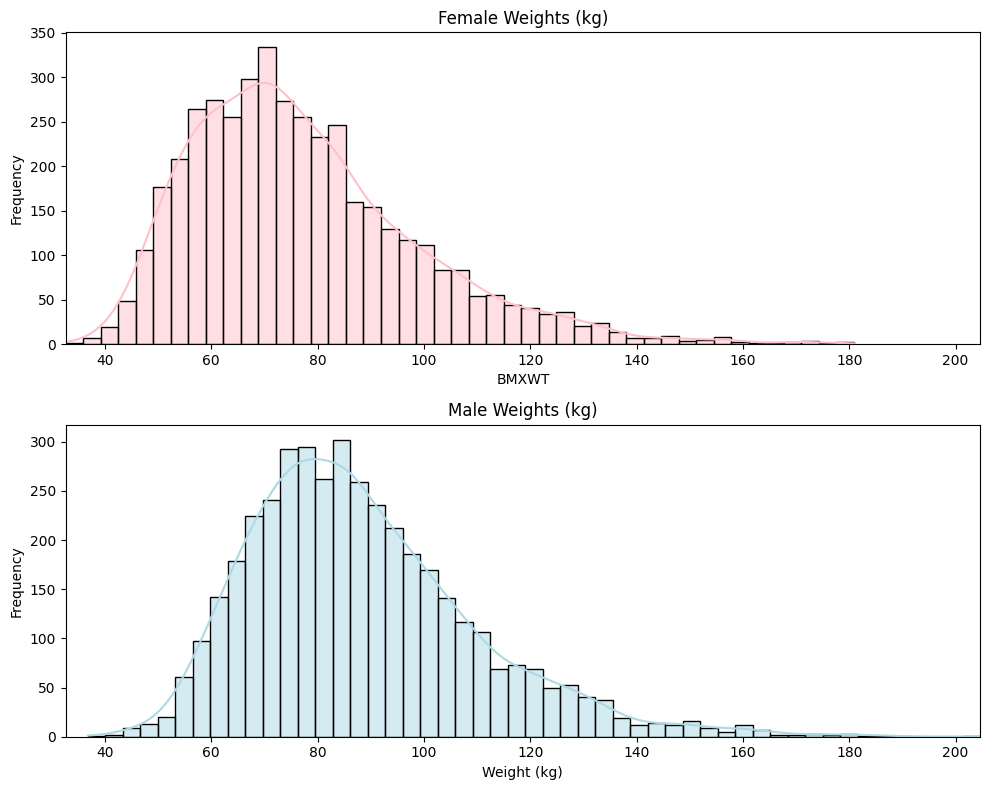

In [17]:
# Create a figure with two subplots 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Create histogram for females =>top subplot
sns.histplot(data=female_df, x='BMXWT', ax=ax1, color='pink', kde=True)
ax1.set_title('Female Weights (kg)')
ax1.set_ylabel('Frequency')

# Create histogram for males =>bottom subplot
sns.histplot(data=male_df, x='BMXWT', ax=ax2, color='lightblue', kde=True)
ax2.set_title('Male Weights (kg)')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency')

# Find the overall min and max for x-axis limits
min_weight = min(female_df['BMXWT'].min(), male_df['BMXWT'].min())
max_weight = max(female_df['BMXWT'].max(), male_df['BMXWT'].max())

# Set the same x-axis limits for both subplots
ax1.set_xlim(min_weight, max_weight)
ax2.set_xlim(min_weight, max_weight)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# getting weights from both matrices and => first column contains weights
female_weights = female[:, 0]  # First column of female matrix
male_weights = male[:, 0]      # First column of male matrix

female_weights

array([97.1, 91.1, 73. , ..., 73. , 78.6, 82.8])

4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by 
side, giving the male and female weights so that they can be compared to each other. 
Note that the boxplot function can be fed with a list of two vectors like [female_weights, 
male_weights]. In your own words, discuss the results.

C:\Users\prith\AppData\Local\Temp\ipykernel_2724\3444830590.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


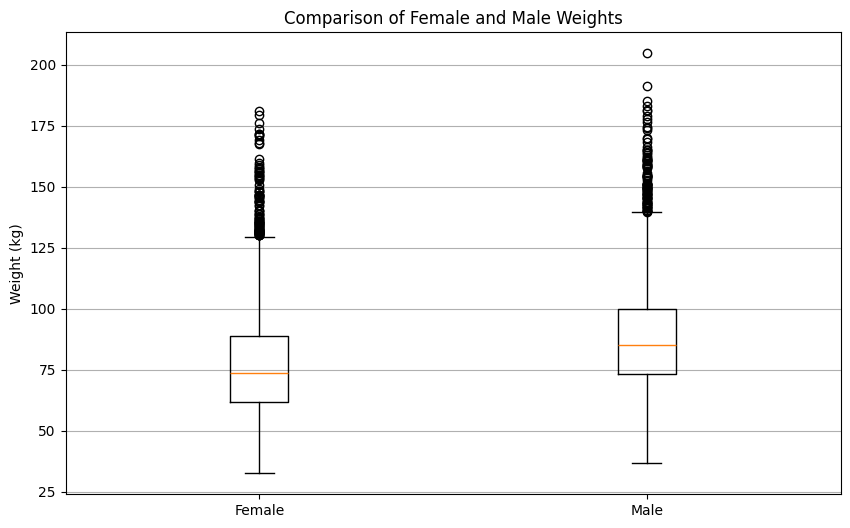

In [19]:
# Create a box plot with both datasets side by side
plt.figure(figsize=(10, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])

# Add title and labels
plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')

# Show the plot
plt.show()

5. Compute the basic numerical aggregates of the male and female weights (measures 
of location, dispersion, and shape). In your own words, describe and compare the two 
distributions (e.g., are they left skewed, which one has more dispersion, and so forth). 

In [20]:
# Calculate basic statistical measures for both groups
female_stats = {
    "Mean": np.mean(female_weights),
    "Median": np.median(female_weights),
    "Standard Deviation": np.std(female_weights),
    "Variance": np.var(female_weights),
    "Minimum": np.min(female_weights),
    "Maximum": np.max(female_weights),
    "Range": np.max(female_weights) - np.min(female_weights),
    "Skewness": stats.skew(female_weights), 
    "Kurtosis": stats.kurtosis(female_weights)
}

male_stats = {
    "Mean": np.mean(male_weights),
    "Median": np.median(male_weights),
    "Standard Deviation": np.std(male_weights),
    "Variance": np.var(male_weights),
    "Minimum": np.min(male_weights),
    "Maximum": np.max(male_weights),
    "Range": np.max(male_weights) - np.min(male_weights),
    "Skewness": stats.skew(male_weights),
    "Kurtosis": stats.kurtosis(male_weights)
}

# Create a DataFrame to display the statistics side by side
stats_df = pd.DataFrame({
    "Female Weights": female_stats,
    "Male Weights": male_stats
})

# Display the statistics
print(stats_df)

                    Female Weights  Male Weights
Mean                     77.403791     88.364543
Median                   73.600000     85.000000
Standard Deviation       21.542508     21.418937
Variance                464.079663    458.770850
Minimum                  32.600000     36.800000
Maximum                 180.900000    204.600000
Range                   148.300000    167.800000
Skewness                  1.033361      0.984281
Kurtosis                  1.400968      1.474288


6. To the female matrix, add the eight column which gives the body mass indices of all 
the female participants. 

In [21]:
female_weights = female[:, 0]       # Weight in kg
female_heights = female[:, 1] / 100  # Height in cm converted to meters

# Calculate BMI(body mass )
female_bmi = female_weights / (female_heights ** 2)

# Add BMI as 8th column to female matrix
female_with_bmi = np.column_stack((female, female_bmi))

In [22]:
female_with_bmi .shape

(4221, 8)

just for check

In [23]:
# it is just for Checking.

female[:1]       

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9]])

In [24]:
# it is just for Checking.

female[:,0] 

array([97.1, 91.1, 73. , ..., 73. , 78.6, 82.8])

In [25]:
# it is just for Checking.

column_names = [
    'BMXWT',    # Weight (kg)
    'BMXHT',    # Height (cm)
    'BMXARML',  # Upper arm length (cm)
    'BMXLEG',   # Upper leg length (cm)
    'BMXARMC',  # Arm circumference (cm)
    'BMXHIP',   # Hip circumference (cm)
    'BMXWAIST',  # Waist circumference (cm)
    'female_body_mass'
]

# Create DataFrame from matrix
female_df_from_matrix = pd.DataFrame(data=female_with_bmi, columns=column_names)

# Display the first few rows
print(female_df_from_matrix.head())

   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST  female_body_mass
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9         37.835041
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1         39.069720
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0         28.092655
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5         24.904378
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2         23.178791


7. Create a new matrix zfemale being a version of the female dataset with all its columns 
standardised (by computing the z-scores of each column). 

# z-scores 

In [26]:
zfemale = np.zeros_like(female_with_bmi)  # Create empty matrix with same shape


for col in range(female_with_bmi.shape[1]):
    # Get column values
    column_values = female_with_bmi[:, col]   
    # Calculate mean of the colum 
    
    print(column_values)

    col_mean = np.mean(column_values)
    # Calculate mean of the standard deviation
    col_std = np.std(column_values)
    
    # Convert to z-scores: (value - mean) / std
    zfemale[:, col] = (column_values - col_mean) / col_std

[97.1 91.1 73.  ... 73.  78.6 82.8]
[160.2 152.7 161.2 ... 159.6 168.5 147.8]
[34.7 33.5 37.4 ... 36.2 38.1 34.8]
[40.8 33.  38.  ... 37.  40.2 32.8]
[35.8 38.5 31.8 ... 31.4 36.  39.5]
[126.1 125.5 106.2 ... 104.6 102.4 121.4]
[117.9 103.1  92.  ...  99.3  98.5 110. ]
[37.83504078 39.06972037 28.09265496 ... 28.65873958 27.68361084
 37.90368801]


just for check

In [27]:
# Print a few rows to verify
print("Standardized female matrix (first 3 rows):")
print(zfemale[:3])

# Verify that each column now has mean ≈ 0 and std ≈ 1
print("\nMeans of each column in zfemale:")
print(np.mean(zfemale, axis=0))
print("\nStandard deviations of each column in zfemale:")
print(np.std(zfemale, axis=0))

Standardized female matrix (first 3 rows):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]]

Means of each column in zfemale:
[-2.08735606e-16  1.89208727e-15  7.65925005e-16  5.63922806e-16
  1.01001100e-17  5.55506048e-16 -8.58509347e-16  1.38034836e-16]

Standard deviations of each column in zfemale:
[1. 1. 1. 1. 1. 1. 1. 1.]


8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, 
waist circumference, hip circumference, and BMI of the females (based on zfemale). 
Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. 
Interpret the obtained results. 

<Figure size 1200x1000 with 0 Axes>

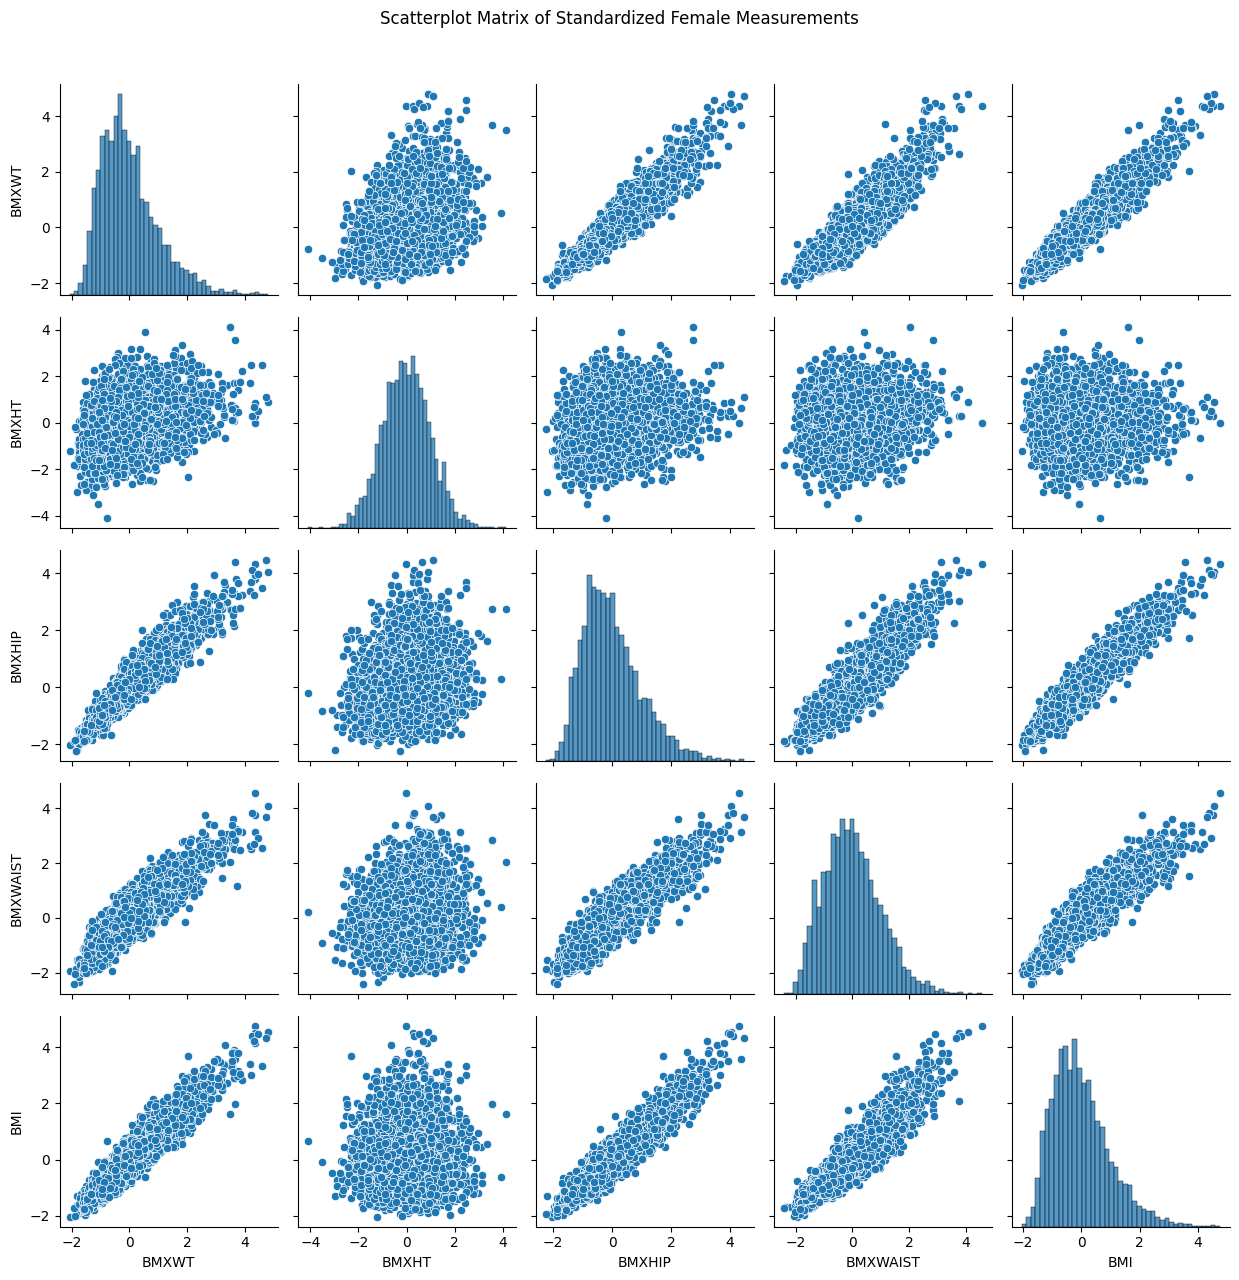

In [28]:
# First, converting the zfemale matrix to a DataFrame with column names

column_names = [
    'BMXWT',    # Weight (kg)
    'BMXHT',    # Height (cm)
    'BMXARML',  # Upper arm length (cm)
    'BMXLEG',   # Upper leg length (cm)
    'BMXARMC',  # Arm circumference (cm)
    'BMXHIP',   # Hip circumference (cm)
    'BMXWAIST', # Waist circumference (cm)
    'BMI'       # BMI (body mass)
]


zfemale_df = pd.DataFrame(data=zfemale, columns=column_names)

# Select only the columns you need for the pairplot
selected_columns = ['BMXWT', 'BMXHT', 'BMXHIP', 'BMXWAIST', 'BMI']
zfemale_selected = zfemale_df[selected_columns]

# Create the pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(zfemale_selected)
plt.suptitle('Scatterplot Matrix of Standardized Female Measurements', y=1.02)
plt.tight_layout()
plt.show()

In [29]:
# Calculate correlations
pearson_corr = zfemale_selected.corr(method='pearson')
spearman_corr = zfemale_selected.corr(method='spearman')

# Display correlations
print("Pearson Correlation:")
print(pearson_corr)
print("\nSpearman Correlation:")
print(spearman_corr)

Pearson Correlation:
             BMXWT     BMXHT    BMXHIP  BMXWAIST       BMI
BMXWT     1.000000  0.345496  0.946553  0.904550  0.945900
BMXHT     0.345496  1.000000  0.202895  0.126547  0.033077
BMXHIP    0.946553  0.202895  1.000000  0.897407  0.944199
BMXWAIST  0.904550  0.126547  0.897407  1.000000  0.921198
BMI       0.945900  0.033077  0.944199  0.921198  1.000000

Spearman Correlation:
             BMXWT     BMXHT    BMXHIP  BMXWAIST       BMI
BMXWT     1.000000  0.338860  0.946634  0.900169  0.937999
BMXHT     0.338860  1.000000  0.205405  0.108587  0.019897
BMXHIP    0.946634  0.205405  1.000000  0.888037  0.934196
BMXWAIST  0.900169  0.108587  0.888037  1.000000  0.923114
BMI       0.937999  0.019897  0.934196  0.923114  1.000000


9. Compute the waist circumference to height ratio and the waist circumference to hip 
circumference ratio of the male and female participants by adding two more columns to 
the males and females matrices. 

In [30]:
#  taking the needed measurements
female_waist = female[:, 6]     # Waist circumference (7th column, index 6)
female_height = female[:, 1]    # Height (2nd column, index 1)
female_hip = female[:, 5]       # Hip circumference (6th column, index 5)

#  Calculate the ratios
female_waist_height_ratio = female_waist / female_height
female_waist_hip_ratio = female_waist / female_hip

#  Adding these new columns to the female_with_bmi matrix
female_with_ratios = np.column_stack((female_with_bmi, female_waist_height_ratio, female_waist_hip_ratio))

# just to Check  we added 2 columns
print("Shape after adding ratios:", female_with_ratios.shape)

#  to See the first few rows to verify
print("\nFirst row with ratios added:")
print(female_with_ratios[0])

Shape after adding ratios: (4221, 10)

First row with ratios added:
[ 97.1        160.2         34.7         40.8         35.8
 126.1        117.9         37.83504078   0.73595506   0.93497224]


In [31]:
# taking the needed measurements
male_waist = male[:, 6]     # Waist circumference (7th column, index 6)
male_height = male[:, 1]    # Height (2nd column, index 1)
male_hip = male[:, 5]       # Hip circumference (6th column, index 5)

#  Calculate the ratios
male_waist_height_ratio = male_waist / male_height
male_waist_hip_ratio = male_waist / male_hip

#  add BMI to male matrix 
male_heights_m = male[:, 1] / 100  # Convert height from cm to meters
male_weights = male[:, 0]          # Weight in kg
male_bmi = male_weights / (male_heights_m ** 2)
male_with_bmi = np.column_stack((male, male_bmi))

#  Adding these new columns to the male_with_ratios
male_with_ratios = np.column_stack((male_with_bmi, male_waist_height_ratio, male_waist_hip_ratio))

# just to Check  we added 2 columns
print("Male matrix shape after adding ratios:", male_with_ratios.shape)
print("\nFirst row with ratios added:")
print(male_with_ratios[0])

Male matrix shape after adding ratios: (4081, 10)

First row with ratios added:
[ 98.8        182.3         42.          40.1         38.2
 108.2        120.4         29.72922633   0.66044981   1.11275416]


10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution 
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants. 
Explain what you see. 

C:\Users\prith\AppData\Local\Temp\ipykernel_2724\4183795894.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([female_wh_ratio, male_wh_ratio], labels=['Female', 'Male'])
C:\Users\prith\AppData\Local\Temp\ipykernel_2724\4183795894.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([female_whip_ratio, male_whip_ratio], labels=['Female', 'Male'])


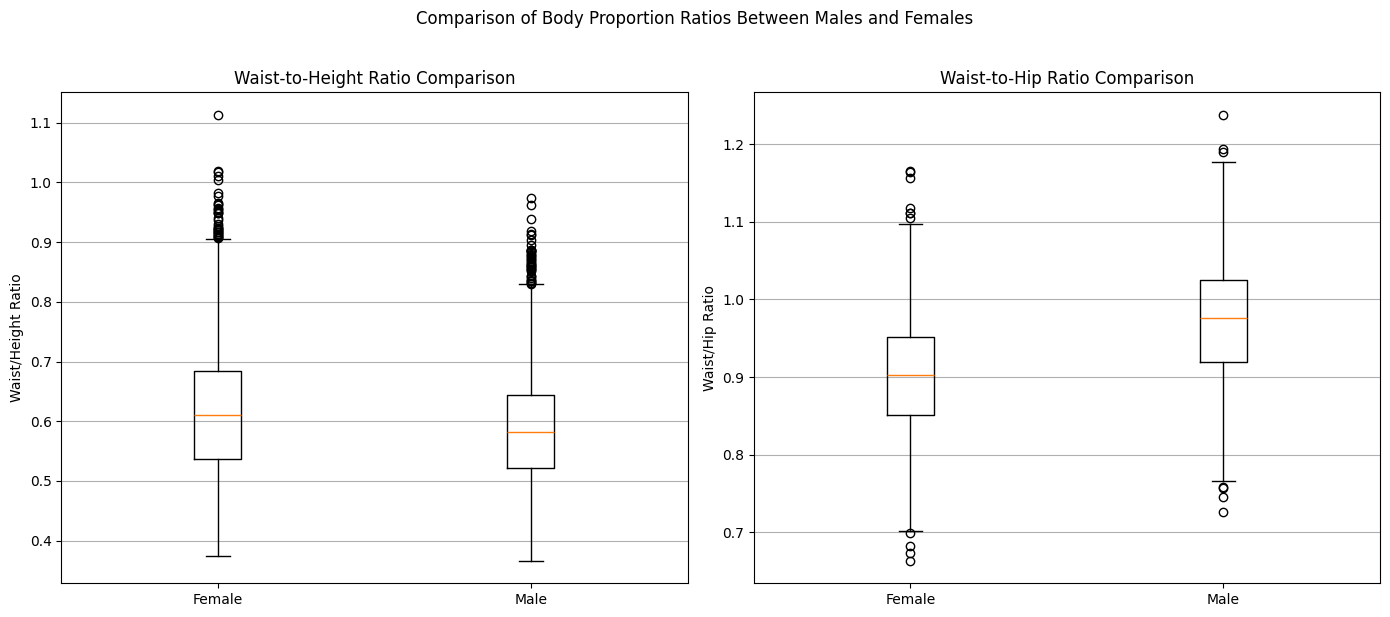

In [33]:
# getting the ratios we want to compare
female_wh_ratio = female_with_ratios[:, 8]   # Waist-to-height ratio
female_whip_ratio = female_with_ratios[:, 9]  # Waist-to-hip ratio

male_wh_ratio = male_with_ratios[:, 8]   # Waist-to-height ratio
male_whip_ratio = male_with_ratios[:, 9]  # Waist-to-hip ratio

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left subplot
ax1.boxplot([female_wh_ratio, male_wh_ratio], labels=['Female', 'Male'])
ax1.set_title('Waist-to-Height Ratio Comparison')
ax1.set_ylabel('Waist/Height Ratio')
ax1.grid(axis='y')

# Right subplot
ax2.boxplot([female_whip_ratio, male_whip_ratio], labels=['Female', 'Male'])
ax2.set_title('Waist-to-Hip Ratio Comparison')
ax2.set_ylabel('Waist/Hip Ratio')
ax2.grid(axis='y')


plt.suptitle('Comparison of Body Proportion Ratios Between Males and Females', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\prith\AppData\Local\Temp\ipykernel_2724\2271213426.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


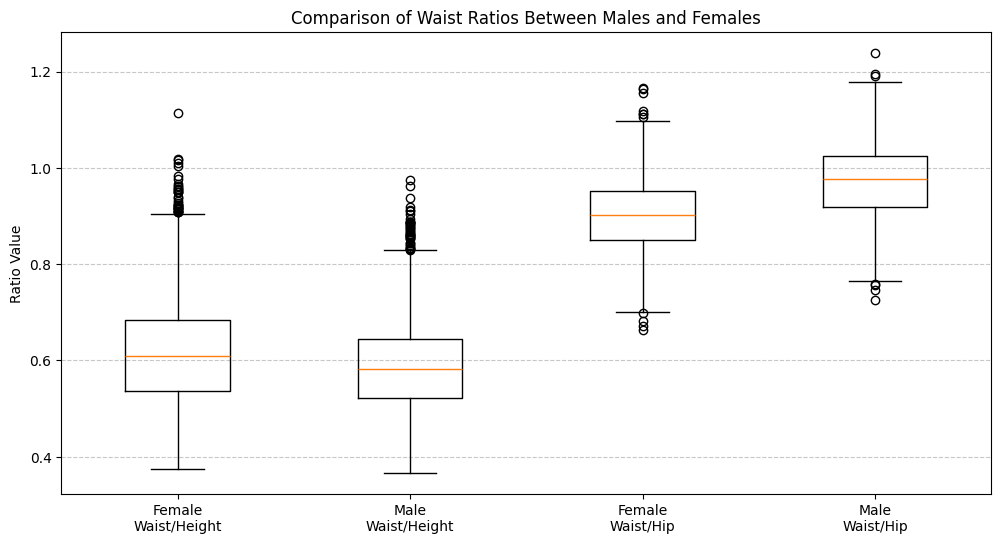

In [34]:
# Extract the ratios we want to compare
female_wh_ratio = female_with_ratios[:, 8]   # Waist-to-height ratio
female_whip_ratio = female_with_ratios[:, 9]  # Waist-to-hip ratio

male_wh_ratio = male_with_ratios[:, 8]   # Waist-to-height ratio
male_whip_ratio = male_with_ratios[:, 9]  # Waist-to-hip ratio

# Create a simpler box plot
plt.figure(figsize=(12, 6))

# Data and labels
data = [female_wh_ratio, male_wh_ratio, female_whip_ratio, male_whip_ratio]
labels = ['Female\nWaist/Height', 'Male\nWaist/Height', 
          'Female\nWaist/Hip', 'Male\nWaist/Hip']

# Create the boxplot
plt.boxplot(data, labels=labels)

# Add title and labels
plt.title('Comparison of Waist Ratios Between Males and Females')
plt.ylabel('Ratio Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

11. In your own words, list some advantages and disadvantages of BMI, waist-to-height 
ratio, and waist-to-hip ratio. 

# BMI (Body Mass Index)

Advantages:
Easy to calculate using just height and weight,        
Widely used by doctors everywhere,
Simple to understand with clear categories (underweight, normal, overweight)

Disadvantages:
Can't tell muscle from fat,
Not accurate for very athletic people,
Doesn't show where fat is stored on the body

# Waist-to-Height Ratio

Advantages:
Better at finding health risks than BMI,
Simple rule: keep waist less than half your height,
Considers belly fat, which is more dangerous

Disadvantages:
Needs careful waist measurement,
Not as commonly used as BMI,
Can vary depending on when you measure (before/after meals)

# Waist-to-Hip Ratio

Advantages:
Shows body shape pattern (apple vs. pear shape),
Good at predicting heart disease risk,
Works well for both thin and heavy people

Disadvantages:
Harder to measure correctly yourself,
Needs different values for men and women,
Hip size can be affected by bone structure

12. Print out the standardised body measurements for the 5 persons with the lowest BMI 
and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised 
of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [35]:
# BMI is in column 7 of the zfemale matrix and sorting the bmi
bmi_indices = np.argsort(zfemale[:, 7])  

# Get the 5 lowest BMI people 
lowest_bmi_indices = bmi_indices[:5]

# Get the 5 highest BMI people 
highest_bmi_indices = bmi_indices[-5:]

# Print measurements for people with lowest BMI
print("People with LOWEST BMI (standardized measurements):")
print("---------------------------------------------------")
for idx in lowest_bmi_indices:
    print(f"Person {idx}: {zfemale[idx]}")

# Print measurements for people with highest BMI
print("\nPeople with HIGHEST BMI (standardized measurements):")
print("----------------------------------------------------")
for idx in highest_bmi_indices:
    print(f"Person {idx}: {zfemale[idx]}")

People with LOWEST BMI (standardized measurements):
---------------------------------------------------
Person 262: [-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
 -1.94212128 -2.05024028]
Person 3478: [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
 -2.05708015 -1.99487987]
Person 2126: [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
 -1.7064556  -1.97088383]
Person 2753: [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
 -1.85590213 -1.94177591]
Person 1209: [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
 -1.71220354 -1.89319577]

People with HIGHEST BMI (standardized measurements):
----------------------------------------------------
Person 2268: [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
  3.81731803  4.39649161]
Person 3022: [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
  2.90339503  4.46201122]
Person 1